# Bayesian Optimization with Gaussian Process (2 dim)

In [103]:
import numpy as np
import matplotlib.pyplot as plt

## Define Ground Truth Function

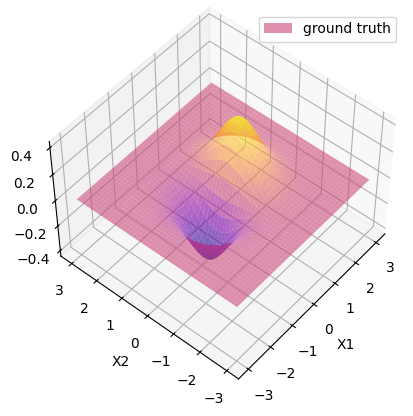

In [146]:
# define ground truth function
def ground_truth_func(x: np.ndarray) -> float:
    """ x: [x1, x2] =>  y: scalar """
    x1, x2 = x
    return x1 * np.exp(-x1**2 - x2**2)

def ground_truth_func_mesh2d(xs_array: np.ndarray) -> np.ndarray:
    """ xs_array: [x1_mesh_array(2d), x2_mesh_array(2d)] =>  y_mesh_array: [y (the same shape as x1_array and x2_array)] """
    y_mesh_array = np.zeros(xs_array.shape[1:])
    for x1idx in range(xs_array.shape[1]):
        for x2idx in range(xs_array.shape[2]):
            y_mesh_array[x1idx, x2idx] = ground_truth_func([xs_array[0, x1idx, x2idx], xs_array[1, x1idx, x2idx]])
    return y_mesh_array

## settings
min_x1, max_x1 = -3.0, +3.0
min_x2, max_x2 = -3.0, +3.0
test_data_size_x1 = 50
test_data_size_x2 = 100
test_data_size = test_data_size_x1 * test_data_size_x2

## generate test data
x1_test = np.linspace(min_x1, max_x1, test_data_size_x1)
x2_test = np.linspace(min_x2, max_x2, test_data_size_x2)
### save data as mesh
x1_test_mesh, x2_test_mesh = np.meshgrid(x1_test, x2_test)
X_test_mesh = np.stack([x1_test_mesh, x2_test_mesh], axis=0)
y_test_mesh = ground_truth_func_mesh2d(X_test_mesh)
### save data as list
X_test_list = np.stack([x1_test_mesh.flatten(), x2_test_mesh.flatten()], axis=1) # => this will be used for gpr.fit()
y_test_list = y_test_mesh.flatten()

## 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot surface of ground truth function
ax.plot_surface(x1_test_mesh, x2_test_mesh, y_test_mesh, cmap="plasma", alpha=0.6, zorder=1, label='ground truth')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.view_init(elev=50, azim=-140) # rotate the 3d view
plt.legend()
plt.show()


## Define Gaussian Process Regressor

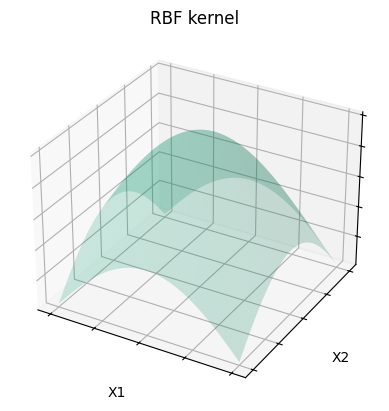

In [115]:
# gaussian process regressor
class GaussianProcessRegression:
    def __init__(self, kernel):
        self.kernel = kernel

    def fit(self, X_test: np.ndarray, X_train: np.ndarray, y_train: np.ndarray):
        # get matrix size
        train_data_size = X_train.shape[0]

        # calculate kernel matrix K (train_data_size x train_data_size)
        K = np.zeros((train_data_size, train_data_size))
        for r in range(train_data_size):
            for c in range(train_data_size):
                K[r, c] = self.kernel(X_train[r], X_train[c])

        # calculate expanded kernel matrix K_big (train_data_size x test_data_size)        
        K_big = np.zeros((train_data_size, test_data_size))
        for r in range(train_data_size):
            for c in range(test_data_size):
                K_big[r, c] = self.kernel(X_train[r], X_test[c])

        # calculate mean and variance
        s = self.kernel(X_test, X_test)
        yy = np.linalg.inv(K) @ y_train
        y_pred = K_big.T @ yy
        y_var = s - np.diag(K_big.T @ np.linalg.inv(K) @ K_big)

        # return prediction and variance as lists
        return y_pred.flatten(), y_var.flatten()

    def optimize(self):
        # TODO: optimize hyperparameters automatically
        pass

# define kernel function
def rbf_kernel(x_i: np.ndarray, x_j: np.ndarray) -> float:
    theta_1 = 1.0
    theta_2 = 3.0
    return theta_1 * np.exp(-1.0 * np.linalg.norm(x_i - x_j, ord=2) ** 2 / theta_2)

# plot kernel function in 3D
x1 = np.linspace(-1.0, 1.0, 100)
x2 = np.linspace(-1.0, 1.0, 100)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
y_mesh = np.zeros(x1_mesh.shape)
for i in range(x1_mesh.shape[0]):
    for j in range(x1_mesh.shape[1]):
        y_mesh[i, j] = rbf_kernel(np.array([x1_mesh[i, j], x2_mesh[i, j]]), np.array([0.0, 0.0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color="#03AF7A", alpha=0.2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('RBF kernel')
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.show()

# Execute Bayesian Optimization

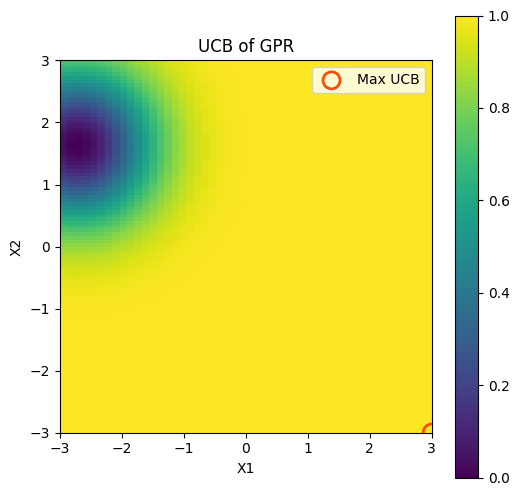

Trial: 01, explored x: [ 3. -3.], explored y = f(x) = 0.00, current optimal x*: [ 3. -3.], current optimal y = f(x*) = 0.00


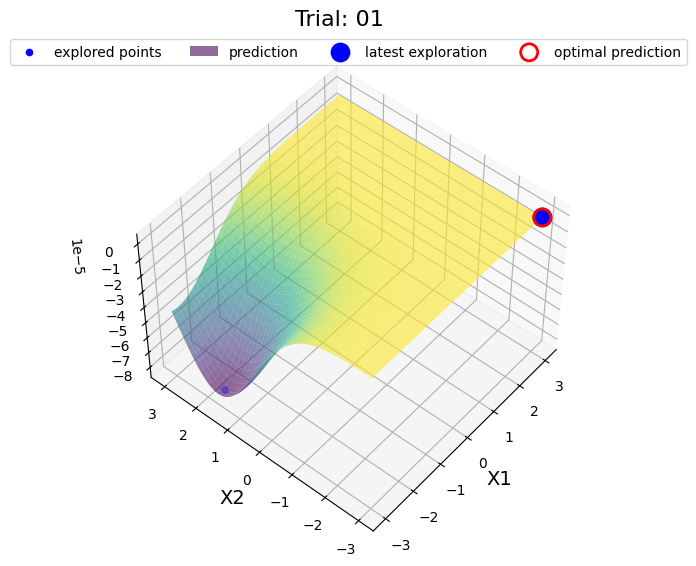

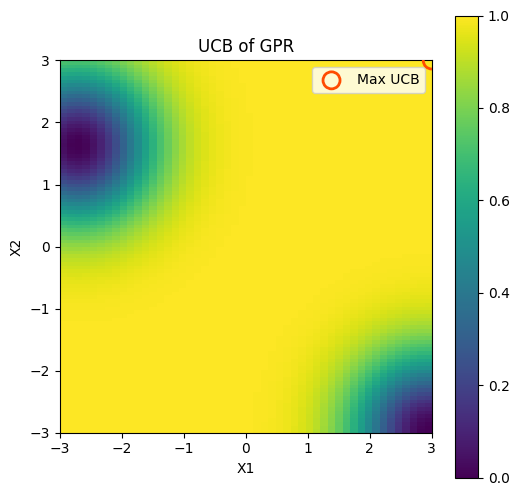

Trial: 02, explored x: [3. 3.], explored y = f(x) = 0.00, current optimal x*: [ 3. -3.], current optimal y = f(x*) = 0.00


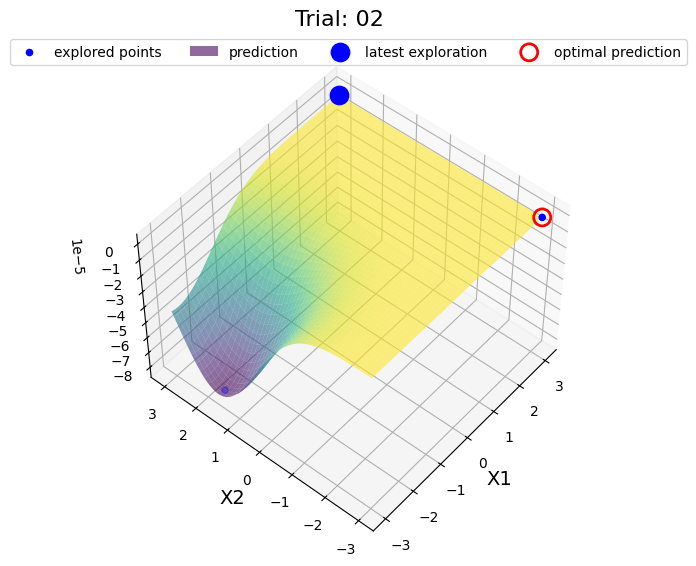

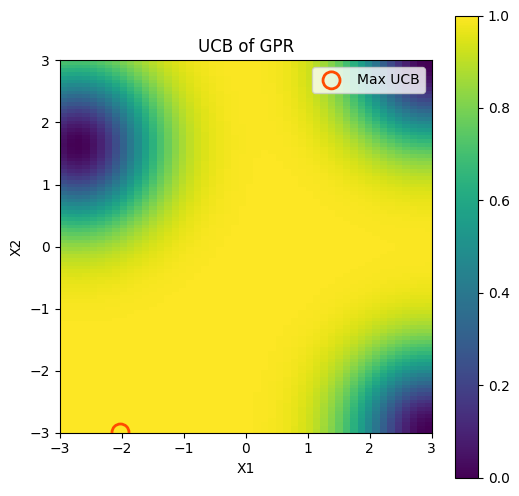

Trial: 03, explored x: [-2.02040816 -3.        ], explored y = f(x) = -0.00, current optimal x*: [ 3. -3.], current optimal y = f(x*) = 0.00


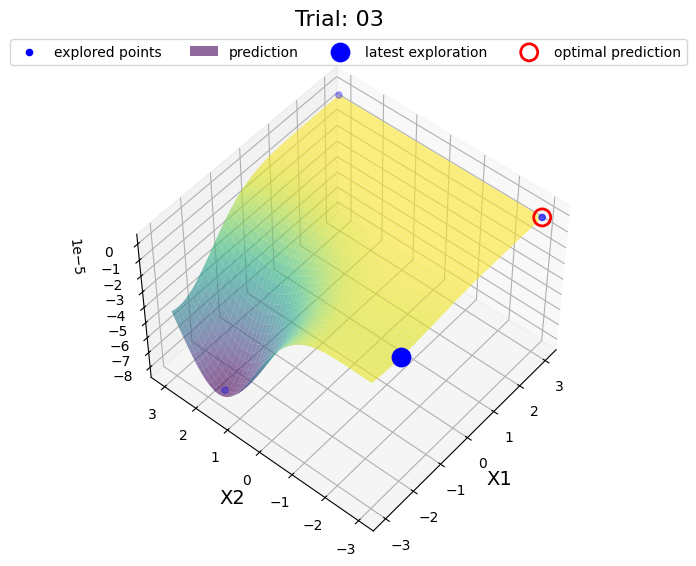

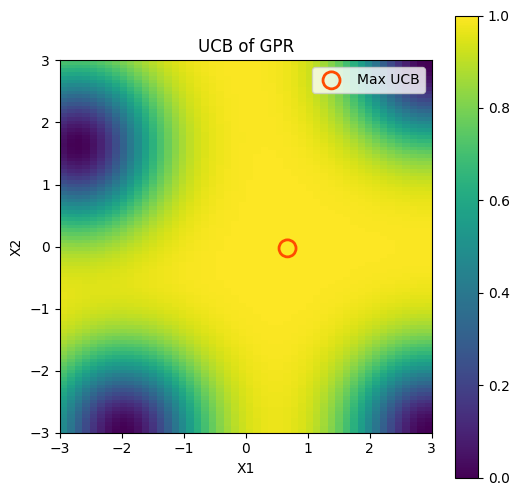

Trial: 04, explored x: [ 0.67346939 -0.03030303], explored y = f(x) = 0.43, current optimal x*: [ 0.67346939 -0.03030303], current optimal y = f(x*) = 0.43


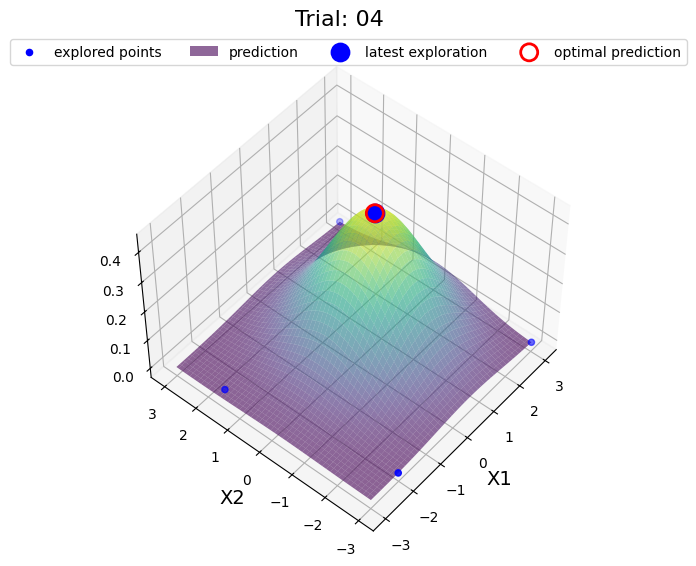

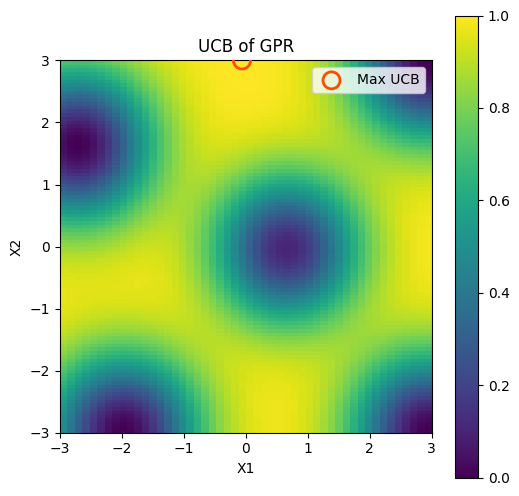

Trial: 05, explored x: [-0.06122449  3.        ], explored y = f(x) = -0.00, current optimal x*: [ 0.67346939 -0.03030303], current optimal y = f(x*) = 0.43


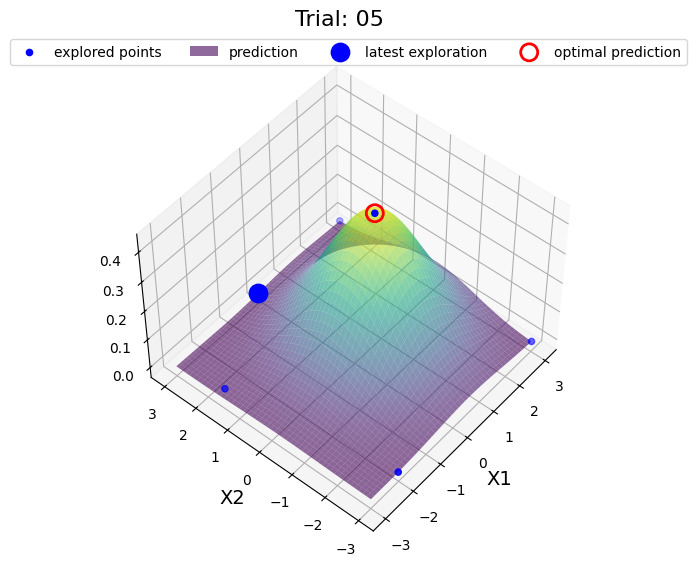

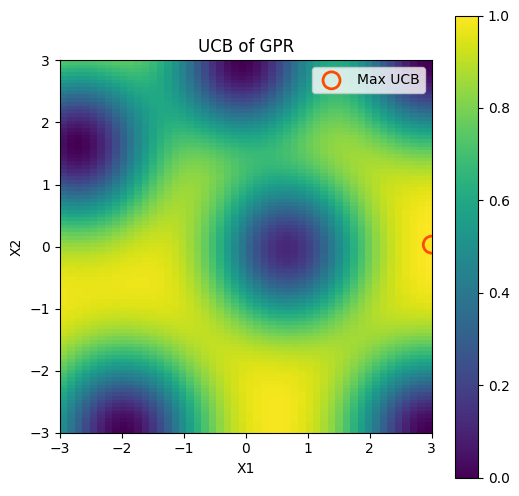

Trial: 06, explored x: [3.         0.03030303], explored y = f(x) = 0.00, current optimal x*: [ 0.67346939 -0.03030303], current optimal y = f(x*) = 0.43


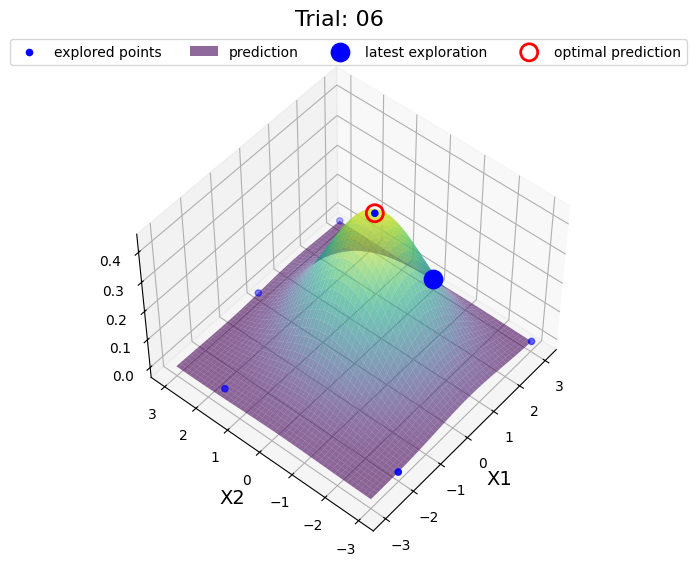

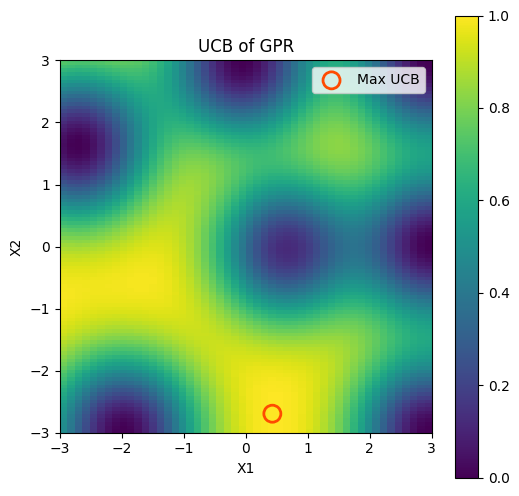

Trial: 07, explored x: [ 0.42857143 -2.6969697 ], explored y = f(x) = 0.00, current optimal x*: [ 0.67346939 -0.03030303], current optimal y = f(x*) = 0.43


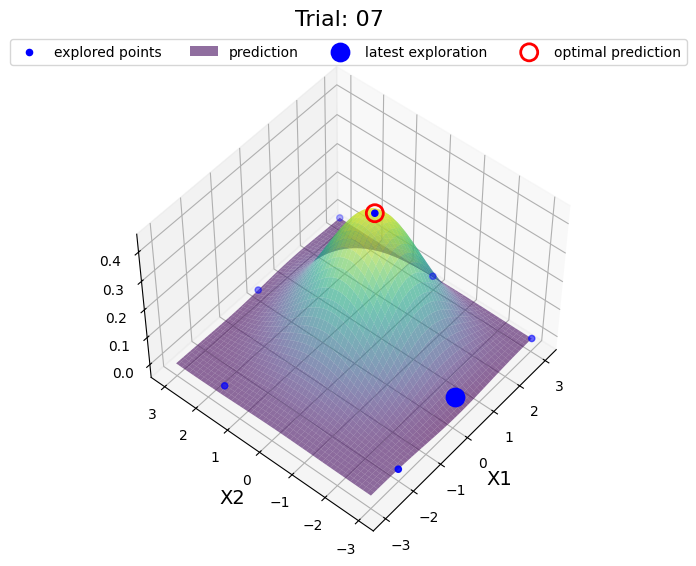

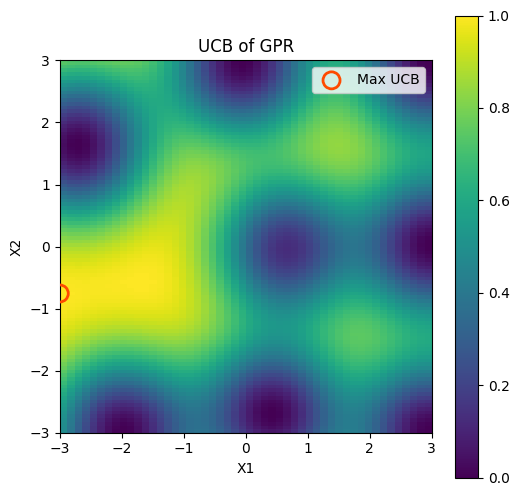

Trial: 08, explored x: [-3.         -0.75757576], explored y = f(x) = -0.00, current optimal x*: [ 0.67346939 -0.03030303], current optimal y = f(x*) = 0.43


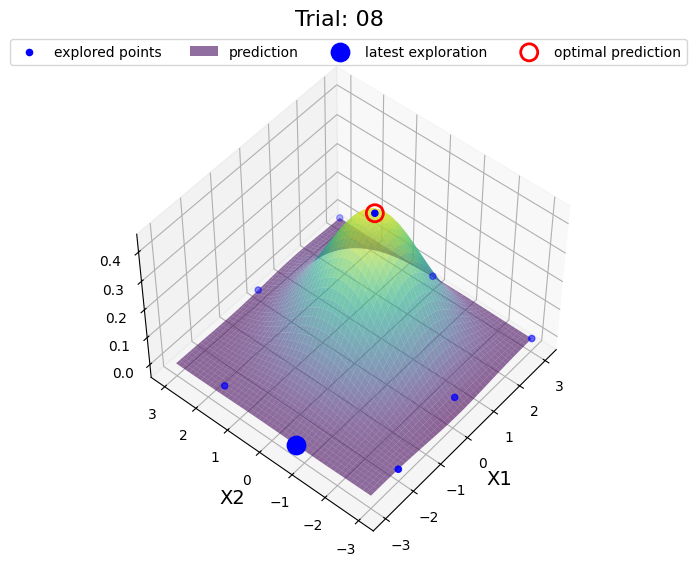

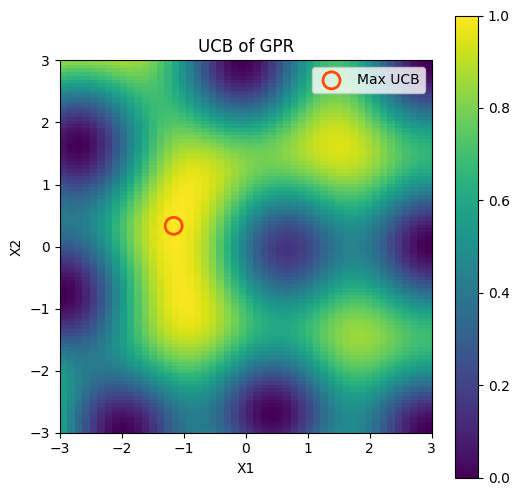

Trial: 09, explored x: [-1.16326531  0.33333333], explored y = f(x) = -0.27, current optimal x*: [ 0.91836735 -0.09090909], current optimal y = f(x*) = 0.45


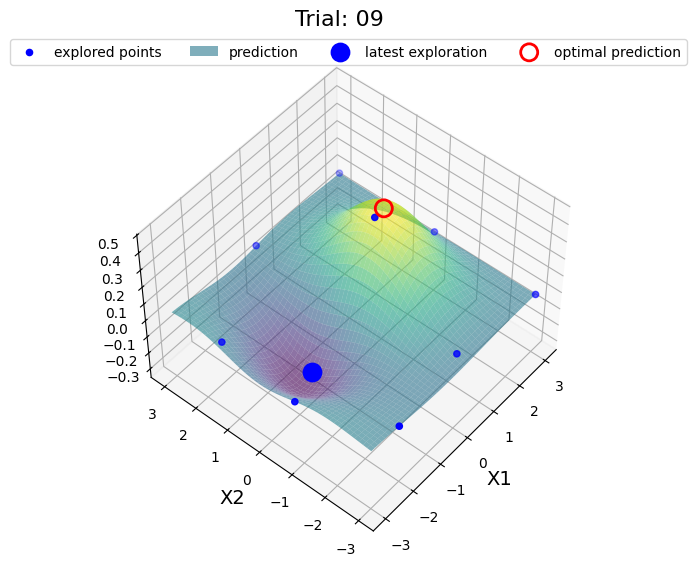

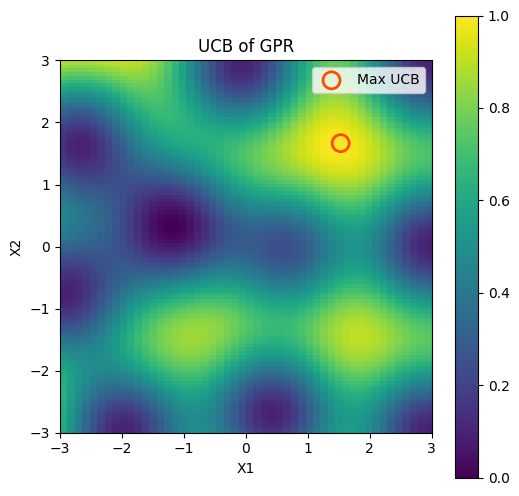

Trial: 10, explored x: [1.53061224 1.66666667], explored y = f(x) = 0.01, current optimal x*: [ 0.91836735 -0.21212121], current optimal y = f(x*) = 0.45


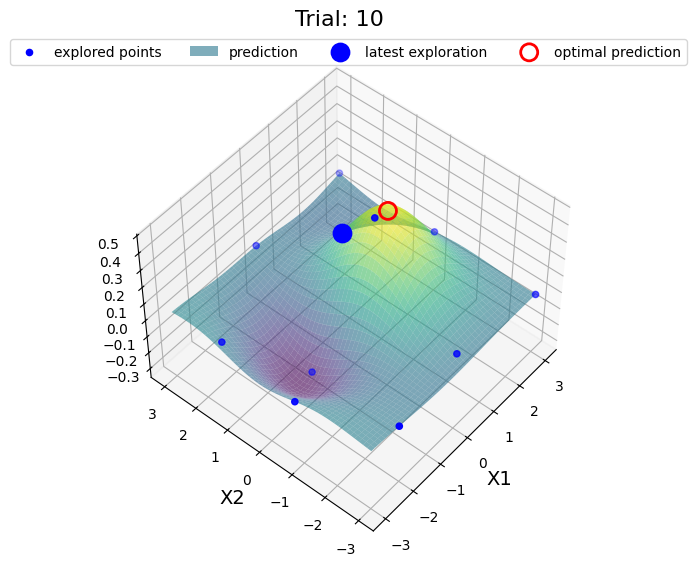

In [159]:
# settings
min_x, max_x = 0.0, +10.0
min_x1, max_x1 = -3.0, +3.0
min_x2, max_x2 = -3.0, +3.0
test_data_size_x1 = 50
test_data_size_x2 = 100
test_data_size = test_data_size_x1 * test_data_size_x2
initial_train_data_size = 1
num_total_trials = 10

# define acquisition function (upper confidence bound)
def UCB(mu: np.ndarray, sigma: np.ndarray, num_current_trial) -> np.ndarray:
    # [type 1] set k as constant
    # k = 30.0
    # [type 2] set k as function of n
    n = (num_current_trial+1) * 50
    k = 30.0 * np.sqrt(np.log(n) / n)
    return mu + k * sigma

# run bayesian optimization
## initialize training and test data
x1_train = np.random.uniform(min_x1, max_x1, initial_train_data_size)
x2_train = np.random.uniform(min_x2, max_x2, initial_train_data_size)
y_train = np.array([ground_truth_func([x1_train[train_idx], x2_train[train_idx]]) for train_idx in range(initial_train_data_size)])
X_train = np.stack([x1_train, x2_train], axis=1)

X_test_list = np.stack([x1_test_mesh.flatten(), x2_test_mesh.flatten()], axis=1)
y_test_list = y_test_mesh.flatten()
gpr = GaussianProcessRegression(kernel=rbf_kernel)
y_pred_list, y_var_list = gpr.fit(X_test_list, X_train, y_train)
ucb = UCB(y_pred_list, y_var_list, 0)
max_ucb_idx = np.argmax(ucb)

## repeat exploration process for num_total_trials times
for trial in range(1, num_total_trials+1):
    ucb = UCB(y_pred_list, y_var_list, trial)
    max_ucb_idx = np.argmax(ucb)

    # plot the UCB in 2d
    ucb_mesh = ucb.reshape(test_data_size_x2, test_data_size_x1)
    plt.figure(figsize=(6, 6))
    plt.imshow(ucb_mesh, cmap='viridis', extent=[min_x1, max_x1, min_x2, max_x2], origin='lower')
    plt.scatter(X_test_list[max_ucb_idx, 0], X_test_list[max_ucb_idx, 1], fc="none", ec="#FF4B00", s=150, linewidth=2, zorder=4, label='Max UCB')
    plt.colorbar()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('UCB of GPR')
    plt.legend()
    plt.show()

    # get next exploration point which has maximum UCB
    x_next = X_test_list[max_ucb_idx]
    y_next = ground_truth_func(x_next)

    # check if X_train already has x_next, if not, append x_next to X_train
    if not np.any(np.all(X_train == x_next, axis=1)):
        X_train = np.append(X_train, [x_next], axis=0)
        y_train = np.append(y_train, y_next)
    else:
        print("[WARNING] x_next is already in X_train")
        print("x_next:", x_next)
        print("X_train:", X_train)
        print("End of exploration")
        break

    # fit GPR and get prediction and variance
    y_pred_list, y_var_list = gpr.fit(X_test_list, X_train, y_train)
    max_pred_idx = np.argmax(y_pred_list)
    print(f"Trial: {trial:02d}, explored x: {x_next}, explored y = f(x) = {y_next:.2f}, current optimal x*: {X_test_list[max_pred_idx]}, current optimal y = f(x*) = {y_pred_list[max_pred_idx]:.2f}")

    # plot the result [y=f(x)]
    fig = plt.figure(figsize=(7, 6))
    fig.suptitle(f"Trial: {trial:02d}", fontsize=16)
    ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), c='blue', marker='o', zorder=2, label='explored points')
    y_pred_mesh = y_pred_list.reshape(test_data_size_x2, test_data_size_x1) # confusing order, but correct
    ax.plot_surface(x1_test_mesh, x2_test_mesh, y_pred_mesh, cmap='viridis', alpha=0.6, zorder=1, label='prediction')
    # plot latest exploration point
    ax.scatter(x_next[0], x_next[1], y_next, fc="blue", ec="blue", s=150, linewidth=2, zorder=4, label='latest exploration')
    # plot maximum prediction
    max_pred_idx = np.argmax(y_pred_list)
    ax.scatter(X_test_list[max_pred_idx, 0], X_test_list[max_pred_idx, 1], y_pred_list[max_pred_idx], fc="none", ec="#FF0000", s=150, linewidth=2, zorder=4, label='optimal prediction')
    ax.set_xlabel('X1', fontsize=14)
    ax.set_ylabel('X2', fontsize=14)
    ax.view_init(elev=50, azim=-140) # rotate the 3d view
    plt.legend(loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.08))
    plt.savefig(f"{trial:02d}.png", dpi=300)
    plt.show()